#### This program aims to predict whether a passenger would survive on the titanic using a logistic regression model and knn model

## IMPORT LIBRARIES

In [65]:
# IMPORT NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
%matplotlib inline

## LOAD AND IMPORT DATA

In [7]:
# LOAD THE DATA
data = pd.read_csv('titanic.csv')

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## DATA EXPLORATION 

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.shape

(891, 12)

In [11]:
data[data.isnull().any(axis=1)].shape

(708, 12)

Here we see that there are a lot of rows with missing data.

In [12]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

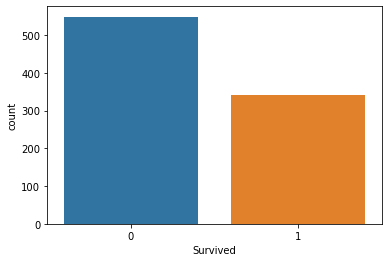

In [15]:
#Checking how many people survived 
print(data["Survived"].value_counts())
sns.countplot(x = data["Survived"])

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

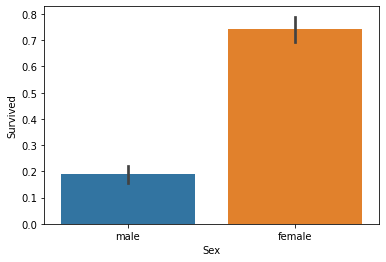

In [16]:
sns.barplot(x = data["Sex"],y = data["Survived"])

We see that survival rate for females is higher.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

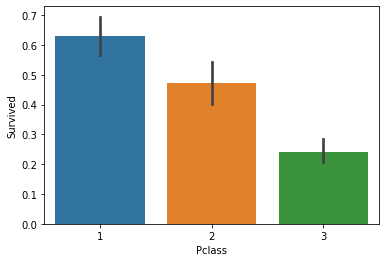

In [17]:
sns.barplot(x = data["Pclass"],y = data["Survived"])

First class has highest survival rate whereas lowest for third class.
Similarlly it can be checked for every feature.

##### MISSING DATA

In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Cabin feature misses a lot of values.

In [19]:
#dropping Cabin
data = data.drop(['Cabin','PassengerId','Name','Ticket'],axis = 1)

In [20]:
data[data.isnull().any(axis=1)].shape

(179, 8)

Now, no of NaN data has considerably decreased

In [21]:
# We will now drop rows with NaN in age and embarked
data = data.dropna(subset = ['Embarked','Age'])

In [22]:
data[data.isnull().any(axis=1)].shape

(0, 8)

### LABEL ENCODING

In [25]:
from sklearn.preprocessing import LabelEncoder
#intanziating
labelencoder = LabelEncoder()

In [26]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [27]:
#encode the Sex column
data.loc[:,'Sex'] = labelencoder.fit_transform(data.loc[:,'Sex'].values)

In [28]:
#encode the Embared column
data.loc[:,'Embarked'] = labelencoder.fit_transform(data.loc[:,'Embarked'].values)

In [29]:
data['Sex'].unique()

array([1, 0])

In [30]:
data['Embarked'].unique()

array([2, 0, 1])

### CORRELATION

In [31]:
corr = data.corr()

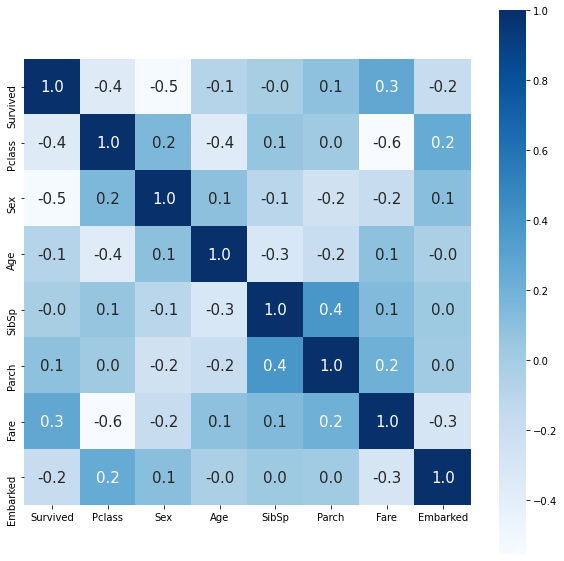

In [32]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, cbar = True, square = True , fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')
plt.show()

### SPLITTING THE TRAINING DATA INTO FEATURES AND TARGET

In [34]:
y = data.loc[:,'Survived']
X = data.drop(['Survived'],axis = 1)

In [35]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [36]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [37]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
X = scaler.fit_transform(X)

### SPLITTING INTO TEST AND TRAIN HALVES

In [41]:
from sklearn.model_selection import train_test_split

In [57]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.3 , random_state = 3)

## LOGISTIC REGRESSION

### MODEL

In [58]:
#importing the model
from sklearn.linear_model import LogisticRegression

In [59]:
logisticregressor = LogisticRegression()

### TRAINING THE MODEL

In [60]:
logisticregressor.fit(X_train,y_train)

LogisticRegression()

### MODEL EVALUATION

In [61]:
print(" Accuracy on train data ",logisticregressor.score(X_train,y_train))

 Accuracy on train data  0.7951807228915663


#### This confirms that the model doesnt underfit

In [69]:
log_train_prediction = logisticregressor.predict(X_train)

In [70]:
cm_log_train = confusion_matrix(y_train,log_train_prediction)

In [71]:
print(cm_log_train)

[[248  45]
 [ 57 148]]


In [105]:
log_train_result = (log_train_prediction == y_train)

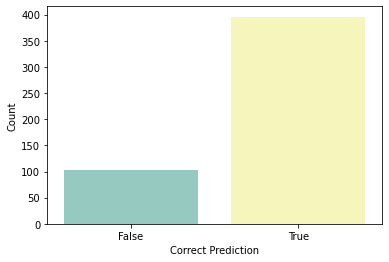

In [124]:
log_train_plot = sns.countplot(x = log_train_result,palette = "Set3")
log_train_plot.set(xlabel='Correct Prediction',ylabel = 'Count')
plt.show()

In [82]:
print(" Accuracy on test data ",logisticregressor.score(X_test,y_test))

 Accuracy on test data  0.7990654205607477


#### The accuracy on test and train data are similar. So they dont overfit either

In [83]:
log_test_prediction = logisticregressor.predict(X_test)

In [84]:
cm_log_test = confusion_matrix(y_test,log_test_prediction)

In [86]:
print(cm_log_test)

[[115  16]
 [ 27  56]]


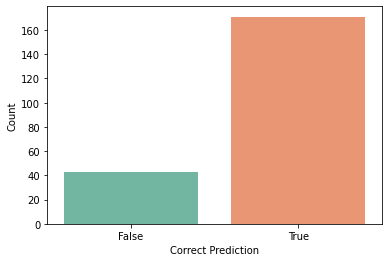

In [123]:
log_test_result = (log_test_prediction == y_test)
log_test_plot = sns.countplot(x = log_test_result,palette = "Set2")
log_test_plot.set(xlabel='Correct Prediction',ylabel = 'Count')
plt.show()

## KNN 

### MODEL

In [89]:
#importing the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

### TRAINING THE MODEL

In [90]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

### MODEL EVALUATION

In [91]:
print(" Accuracy is",knn.score(X_train,y_train))

 Accuracy is 0.8493975903614458


#### Seems knn has more accuracy than logistic regressor on the above training data

In [92]:
knn_train_prediction = knn.predict(X_train)

In [93]:
cm_knn_train = confusion_matrix(y_train,knn_train_prediction)

In [94]:
print(cm_knn_train)

[[268  25]
 [ 50 155]]


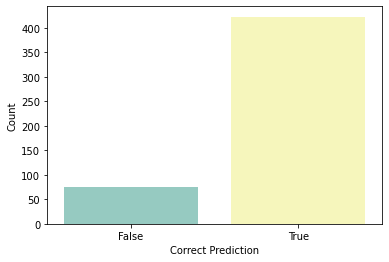

In [125]:
knn_train_result = (knn_train_prediction == y_train)
knn_train_plot = sns.countplot(x = knn_train_result,palette = "Set3")
knn_train_plot.set(xlabel='Correct Prediction',ylabel = 'Count')
plt.show()

In [95]:
print(" Accuracy on test data ",knn.score(X_test,y_test))

 Accuracy on test data  0.8130841121495327


#### The accuracy on test and train data are similar. So they dont overfit either

In [97]:
knn_test_prediction = knn.predict(X_test)

In [98]:
cm_knn_test = confusion_matrix(y_test,knn_test_prediction)

In [99]:
print(cm_knn_test)

[[119  12]
 [ 28  55]]


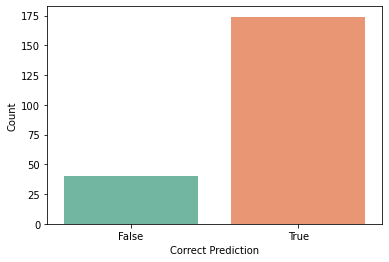

In [128]:
knn_test_result = (knn_test_prediction == y_test)
knn_test_plot = sns.countplot(x = knn_test_result,palette = "Set2")
knn_test_plot.set(xlabel='Correct Prediction',ylabel = 'Count')
plt.show()

### In conclusion , in the above case , KNN model is a bit more accurate as compared to the logistic regression model  